In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from paralleltomo import paralleltomo
from PIL import Image
import matplotlib.pyplot as plt
import math

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [2]:
path = "/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU"
# path = "/Users/karlfindhansen/Desktop/MathModellingDTU/Exam Project/testImage.npy"

In [ ]:
im = np.load(path)
print(im.shape)

plt.imshow(im)
plt.show()

In [163]:
N=8
theta = np.matrix([45.0000,   67.5000,   90.0000,  112.5000,  135.0000,  157.5000,  180.0000,  202.5000,  225.0000,  247.5000,  270.0000, 292.5000,  315.0000])
[A,theta,p,d] = paralleltomo(N,theta,11)

# print([A,theta,p,d])
print(f"A = {A}")
print(np.linalg.matrix_rank(A),A.shape[0])
print()

N=200
theta =np.matrix(np.linspace(0,179,179))
p = 250
[A,theta,p,d] = paralleltomo(N,theta,p)
print(f"A = {A}")
# print([A,theta,p,d])

A = [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.13137085 0.         0.        ]
 [0.         0.         0.         ... 0.         0.84852814 0.56568542]
 [0.         0.         0.         ... 0.         0.         0.        ]]
63 143

A = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Problem 1

In [ ]:
# make the resolution of im to 50 x 50
resized_im = im[::100,::100]
plt.imshow(resized_im)  
plt.show()

#save resized im
np.save('resized_im', resized_im)

In [ ]:
# calculating the A matrix
N = 50
p = 50
theta = np.matrix(np.linspace(0,179,179))
[A,theta,p,d] = paralleltomo(N, theta, p)
print(np.linalg.matrix_rank(A),A.shape)

print(f"A = {A}")

# Simulating forward projection

In [ ]:
def calculatingB(A, resized_im):
    x = np.ravel(resized_im)
    b = np.matmul(A,x)
    return b

b = calculatingB(A, resized_im)
# x with no noise
x_no_Noise = np.linalg.lstsq(A, b)[0]
resized_no_noise_im = np.resize(x_no_Noise, (50,50))
np.save("x_no_noise.npy", resized_no_noise_im)

# adding noise from mean and stanard deviation
def addNoise(b):
    mean = np.mean(b)
    std = np.std(b)
    noise = np.random.normal(mean, std, b.shape)
    noisy_b = b + noise
    return noisy_b

noisy_b = addNoise(b)
x_noisy = np.linalg.lstsq(A, noisy_b)[0]
resized_noise_im = np.resize(x_noisy, (50,50))
np.save("x_with_noise.npy", resized_noise_im)



# Comparing images

In [ ]:
# make a subplot of the three images

original_image = np.load("testImage.npy")
resized_im = np.load("resized_im.npy")
x_no_Noise = np.load("x_no_noise.npy")
x_noisy = np.load("x_with_noise.npy")

# make subplot of the 4 images
def subplot(original_image, resized_im, x_no_Noise, x_noisy):
    fig, axs = plt.subplots(1, 4, figsize=(17, 17))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[1].imshow(resized_im)
    axs[1].set_title("Resized image")
    axs[2].imshow(x_no_Noise)
    axs[2].set_title("Recreated image (using b without noise)")
    axs[3].imshow(x_noisy)
    axs[3].set_title("Recreated image (using b with noise)")
    plt.show()


subplot(original_image, resized_im, x_no_Noise, x_noisy)

# Energies and Resolution
Here it is investegated what x-ray energy is best for the system?

The attenuation of a material is the the measurement of energy absorbed and deflected as it passes through a medium. 

## This part is not done yet

In [164]:
log_size = 0.5 # m

thinkness = N/log_size #m

I0 = [i for i in range(10,210,10)] # keV

x = np.ravel(resized_im) # attenuation coefficients

# plt.plot([i for i in range(len(x))], x)
attenuation_steel = max(x) # max value of the attenuation coefficient
# second max value
attenuation_lead = max([i for i in x if i != attenuation_steel])
# attenuation wood within the range of a standard deviation of the mean
attenuation_wood = np.mean([i for i in x if (i < np.mean(x)+2*np.std(x) and i > 0)])

print(f'Attenation steel = {attenuation_steel}')
print(f'Attenation lead = {attenuation_lead}')
print(f'Attenation wood = {attenuation_wood}')

# sort out the energy values for lead and bismuth

thickness = [thinkness for _ in range(len(x))] # thickness of the material

def calculate_energy(I0, x, l): #this function estimates the x-ray intensity for all different energies
    s = 0
    I = []
    for j in range(len(x)):
        s += x[j]*l[j]
    for i in range(len(I0)):
        I.append(I0[i] * np.exp(-s))
    return I

I = calculate_energy(I0, x, thickness)

# plt.plot(I0, I)
# plt.title("Intensity of the x-rays")
# plt.xlabel("Energy [keV]")
# plt.ylabel("Intensity [keV]")
# plt.show()

# def calculate_attenuation_coefficients(I0, x, thickness): # this function calculates the attenuation coefficients aka b
#     I = calculate_energy(I0, x, thickness)
#     b = []
#     for i in range(len(I0)):
#         b.append(np.log(I0[i]/I[i]))
#     return b

# b = calculate_attenuation_coefficients(I0, x, thickness)
# check if the b values are identical

# print(energy_lead)
# print(energy_bismuth)
    

    

Attenation steel = 395.44319
Attenation lead = 130.6
Attenation wood = 4.2848231320000005


In [3]:
C, H, O = [], [], []
photon_energy = []

filenames = ["carbon.txt", "hydrogen.txt", "oxygen.txt"]

for name in filenames:
    f = open(path+"/davids stuff/"+name, "r")
    for line in f:
        x = list(map(float,line.split()))
        if name=="carbon.txt":
            photon_energy.append(x[0])
            C.append(x[1])
        elif name=="hydrogen.txt":
            H.append(x[1])
        else:
            O.append(x[1])
f.close()

In [4]:
import matplotlib.pyplot as plt
def make_plot(y, el, x):
    d = {"Carbon": 6, "Hydrogen": 1, "Oxygen": 8, "Wood": None,"Steel":None, "Lead":82}
    plt.plot(x, y)
    plt.grid()
    plt.xlabel("Photon Energy, MeV")
    plt.ylabel("\u03BC \ \u03C1")
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f"z = {d[el]}, {el}")
    plt.show()

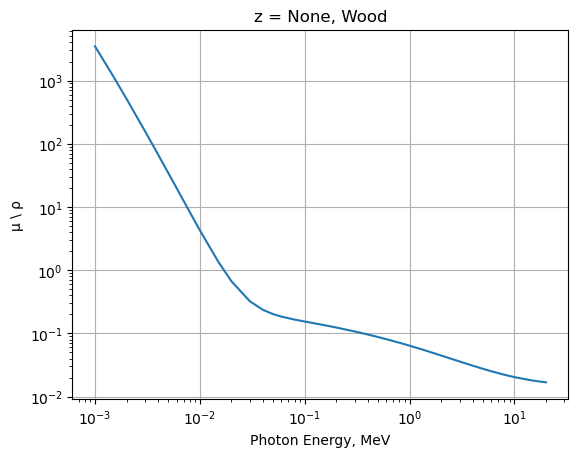

In [5]:
C_prop = 0.458
H_prop =  0.00458
O_prop = 0.537

WOOD = [C_prop*i+O_prop*j+H_prop*k for (i,j,k) in zip(C, O, H)]
make_plot(WOOD, "Wood",photon_energy)

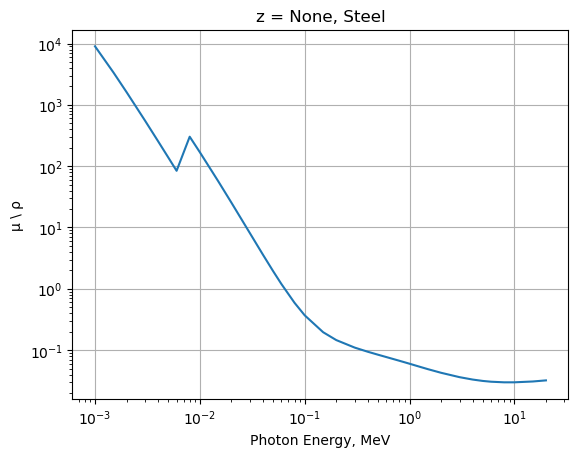

In [6]:
path = "/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU"
filenames = ["carbon.txt","iron.txt"]
Fe_energy = []
C_energy = []
Mn_energy = []

Fe_val = []
C_val = []
Mn_val = []

# f = open(path+"/davids stuff/carbon.txt","r")
# for line in f:
#     x = list(map(float,line.split()))
#     C_energy.append(x[0])
#     C_val.append(x[1])
# f.close()

f = open(path+"/davids stuff/manganese.txt","r")
for line in f:
    x = list(map(float,line.split()))
    Mn_energy.append(x[0])
    Mn_val.append(x[1])
f.close()

f = open(path+"/davids stuff/iron.txt","r")
for line in f:
    x = list(map(float,line.split()))
    if x[0] in Mn_energy:
        Fe_energy.append(x[0])
        Fe_val.append(x[1])
f.close()

Fe_prop = 0.99
# C_prop = 0.0
Mn_prop = 0.003

# STEEL = [C_prop*i+Fe_prop*j for (i,j) in zip(C_val,Fe_val)]
STEEL = [Mn_prop*i+Fe_prop*j for (i,j) in zip(Mn_val,Fe_val)]
make_plot(STEEL, "Steel",Mn_energy)


# len(Fe_energy),len(C_energy)

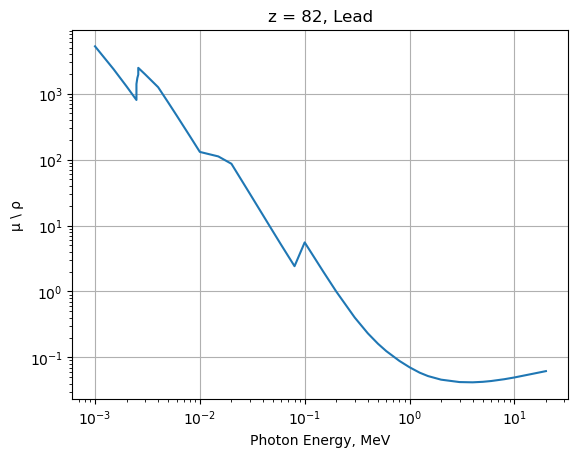

In [169]:
Pb_energy = []
Pb_val = []

f = open(path+"/davids stuff/lead.txt","r")
for line in f:
    x = list(map(float,line.split()))
    Pb_energy.append(x[0])
    Pb_val.append(x[1])
f.close()

make_plot(Pb_val,"Lead",Pb_energy)

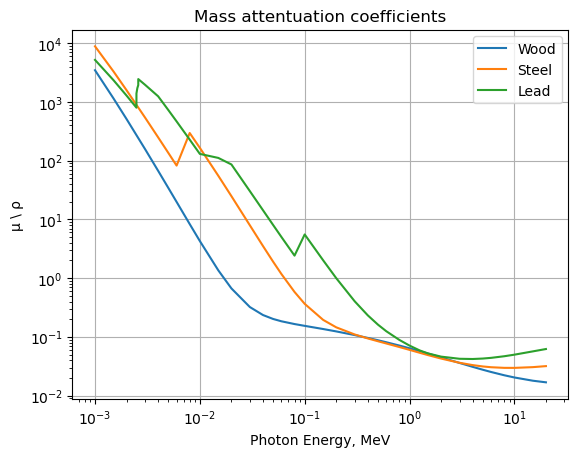

In [170]:


plt.plot(photon_energy, WOOD, label="Wood")
plt.plot(C_energy, STEEL, label="Steel")
plt.plot(Pb_energy, Pb_val, label="Lead")
plt.grid()
plt.xlabel("Photon Energy, MeV")
plt.ylabel("\u03BC \ \u03C1")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(f"Mass attentuation coefficients")
plt.show()

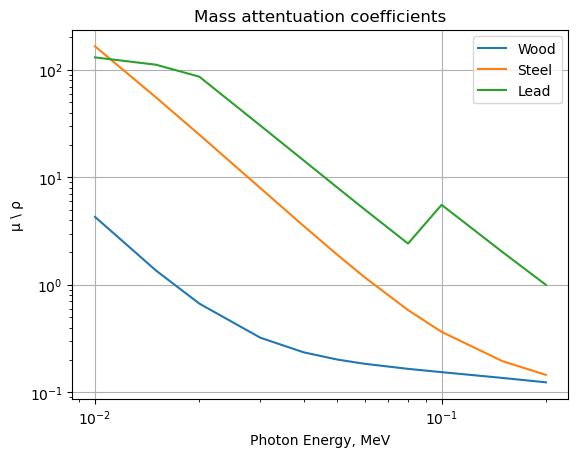

In [171]:
import numpy as np
wood_ip = np.interp(Pb_energy, photon_energy, WOOD)
steel_ip = np.interp(Pb_energy, C_energy, STEEL)

energy = []

wood_cut = []
steel_cut = []
pb_cut = []

for i in range(len(Pb_energy)):
    if Pb_energy[i] >= 0.01 and Pb_energy[i] <= 0.2:
        wood_cut.append(wood_ip[i])
        steel_cut.append(steel_ip[i])
        pb_cut.append(Pb_val[i])
        energy.append(Pb_energy[i])
    
plt.plot(energy, wood_cut, label="Wood")
plt.plot(energy, steel_cut, label="Steel")
plt.plot(energy, pb_cut, label="Lead")
plt.grid()
plt.xlabel("Photon Energy, MeV")
plt.ylabel("\u03BC \ \u03C1")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(f"Mass attentuation coefficients")
plt.show()

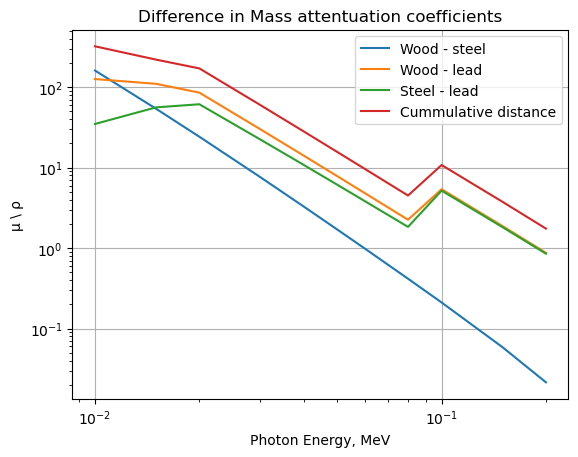

In [172]:
ws = np.abs(np.asarray(wood_cut)-np.asarray(steel_cut))
wl = np.abs(np.asarray(wood_cut)-np.asarray(pb_cut))
sl = np.abs(np.asarray(steel_cut)-np.asarray(pb_cut))

cd = ws+wl+sl

plt.plot(energy, ws, label="Wood - steel")
plt.plot(energy, wl, label="Wood - lead")
plt.plot(energy, sl, label="Steel - lead")
plt.plot(energy, cd, label="Cummulative distance")
plt.grid()
plt.xlabel("Photon Energy, MeV")
plt.ylabel("\u03BC \ \u03C1")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(f"Difference in Mass attentuation coefficients")
plt.show()

The overall ideal x-ray energy is 10 keV, while the best energy to distinguish steel from lead bullets is around 30 keV


In [174]:
energy
print(f"X-ray energy = {energy[3]}")
print(f"Attenuation coefficient wood = {wood_cut[3]}")
print(f"Attenuation coefficient steel = {steel_cut[3]}")
print(f"Attenuation coefficient lead = {pb_cut[3]}")

X-ray energy = 0.03
Attenuation coefficient wood = 0.32190696
Attenuation coefficient steel = 7.938406
Attenuation coefficient lead = 30.32


In [ ]:
L = 0.5
sp = 0.002

N_min = L/sp
N_max = L/(sp/4)

N_min,N_max


# Part 2

Configuration of the system
1) Compute system matrix A for different parameters
2) create test image (original x)
3) determine b from test image
4) add noise to b
5) compute x again from b with added noise
6) compare that x to the original x




In [ ]:
import paralleltomo as pt
import numpy as np
# 10 keV - 35 keV energy x-rays

# paralleltomo(N,theta,p,d)

# Parameters for N (number of pixels): domain measurements (domain is NxN)
# Parameters for theta -> number of angles
# p -> in the range of N_min,N_max (number of parallel rays per angle)
# d -> distance between first and last parallel ray

ps = np.linspace(N_min,N_max,200)
Ns = np.round(ps/np.sqrt(2))

thetas = []

# once every degree (one-directional)
theta = np.matrix(np.linspace(0,179,180))
thetas.append(theta)

# four angles
theta = np.matrix([0.0,90.0,180.0,270.0])
thetas.append(theta)



# thetas
int(ps[0])
int(Ns[0])

# thetas.append(np.matrix(np.linspace(0,270,)))

# N_min,N_max

type(Ns[0])

Determining parameters for A - optimising N 

with thetas: every 1°
and p = 250
1) N = 10 : cond(A) = 0.72, full rank
2) for N = 20 : cond(A) = 0.87, full rank
3) for N = 30 : cond(A) = 0.96, full rank
4) for N = 50 : cond(A) = 1.08, full rank
5) for N = 75 : cond(A) = 1.28, full rank
6) for N >= 100 : computation fairly extensive (>7m)


In [ ]:
N = 10
[A,theta,p,d] = pt.paralleltomo(N,thetas[0],int(ps[0]))
np.log10(np.linalg.cond(A))

# np.linalg.matrix_rank(A)

In [ ]:
np.linalg.matrix_rank(A)

In [ ]:
A.shape[1]

In [ ]:
ps[0] * thetas[0].shape[1] >= 75**2

Assumption: Matrix will be full rank if it is given that:
````
p*len(\theta) >= N^2
````

Since at that point, the matrix will be square


Determining parameters for A - optimising N 

with thetas: every 2°
and p = 250
1) for N < 30 : cond(A) < 1
2) for N = 50 : cond(A) = 1.08
3) for N = 75 : cond(A) = 1.28, full rank
4) for N >= 100 : computation fairly extensive (>7m)

In [ ]:
theta = np.matrix(np.linspace(0,179,90))

In [ ]:
np.log10(np.linalg.norm(A))

In [ ]:
np.linalg.inv(A)

In [ ]:
np.linalg.matrix_rank(A)/A.shape[0]
np.log10(np.linalg.cond(A))

In [ ]:
N=11
theta = np.matrix([45.0000,   67.5000,   90.0000,  112.5000,  135.0000,  157.5000,  180.0000,  202.5000,  225.0000,  247.5000,  270.0000, 292.5000,  315.0000])
[A,theta,p,d] = pt.paralleltomo(N,theta,11)

np.log10(np.linalg.cond(A))



In [ ]:

[A,theta,p,d] = pt.paralleltomo(int(Ns[0]),theta,int(ps[0]))
np.log10(np.linalg.cond(A))

